# An Exploration of the Top 80 Male Tennis Players

The current ranking system that the ATP Tour uses works in real time (as it should), so I wanted to make a ranking system based on career stats, most of which will be averaged based on career length. Roger Federer is currently rank 97, but some argue he is the greatest player of all time. Its for anomalies in the current rankings such as this that inspired me to create a career-base ranking system. 

I scraped data from the atp tour website for the top 80 players on tour (and Roger Federer) to get to the bottom of who, by the numbers, is the best tennis player on tour at the moment.

## Data Exploration and Validation

To start, install and import pandas and some visualization libraries.

In [1]:
pip install -r requirements.txt

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
tennis = pd.read_csv("tennis_player_data.csv")
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,total_service_points_won,1st_serve_return_won,2nd_serve_return_won,total_break_pts,break_pts_conv,return_games_played,return_games_won,return_points_won,total_pts_won,Unnamed: 21
0,Daniil Medvedev,8,Two-Handed Backhand,2845,1187,60,75,52,1897,63,...,66,31,54,2664,42,4238,26,39,52,NaN
1,Alexander Zverev,9,Two-Handed Backhand,3974,1973,65,74,50,2709,61,...,66,31,51,3631,42,6045,25,38,52,NaN
2,Novak Djokovic,19,Two-Handed Backhand,6440,2672,65,74,55,6017,66,...,67,34,55,10278,44,14179,32,42,54,NaN
3,Rafael Nadal,21,Two-Handed Backhand,3856,2066,68,72,57,6309,67,...,67,34,55,10943,45,14633,34,42,55,NaN
4,Casper Ruud,7,Two-Handed Backhand,986,461,65,72,54,1137,63,...,66,29,51,1424,41,2466,24,37,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,James Duckworth,12,Two-Handed Backhand,1096,398,56,72,50,1028,64,...,63,25,47,736,37,1719,16,33,48,NaN
77,Denis Kudla,12,Two-Handed Backhand,1078,637,58,70,51,1390,58,...,62,26,49,1109,40,2392,19,35,48,NaN
78,Tomas Martin Etcheverry,5,Two-Handed Backhand,35,23,71,64,45,98,61,...,58,27,51,58,34,121,17,36,47,NaN
79,Alejandro Tabilo,7,Two-Handed Backhand,143,90,64,68,48,220,56,...,60,32,52,202,44,331,27,39,50,NaN


In [4]:
tennis = tennis.drop('Unnamed: 21', axis = 1)

The backhand column has 2 values 'One-Handed Backhand' and 'Two-Handed-Backhand' so we can make these numerical dummy values.

In [5]:
tennis['backhand_type'] = tennis['backhand_type'].apply(lambda x: 2 if x.strip() == 'Two-Handed Backhand' else 1)

In [6]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,service_games_won,total_service_points_won,1st_serve_return_won,2nd_serve_return_won,total_break_pts,break_pts_conv,return_games_played,return_games_won,return_points_won,total_pts_won
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,83,66,31,54,2664,42,4238,26,39,52
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,82,66,31,51,3631,42,6045,25,38,52
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,86,67,34,55,10278,44,14179,32,42,54
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,86,67,34,55,10943,45,14633,34,42,55
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,83,66,29,51,1424,41,2466,24,37,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,78,63,25,47,736,37,1719,16,33,48
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,76,62,26,49,1109,40,2392,19,35,48
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,69,58,27,51,58,34,121,17,36,47
79,Alejandro Tabilo,7,2,143,90,64,68,48,220,56,...,72,60,32,52,202,44,331,27,39,50


Off the bat, there are a couple things we can add pretty easily:

In [7]:
tennis['total_service_games_won'] = tennis['service_games_played'] * 0.01*tennis['service_games_won']

tennis['total_return_games_won'] = tennis['return_games_played'] * 0.01*tennis['return_games_won']

tennis["total_games_played"] = tennis["service_games_played"] + tennis["return_games_played"]
tennis["total_games_won"] = tennis["total_service_games_won"] + tennis["total_return_games_won"]

tennis['total_break_points_saved'] = tennis['break_points_faced'] * 0.01*tennis['break_points_saved']



Notice that some columns are percentages and some are amounts. Percentages are a good metric to use to compare players, however these are career stats, so when comparing for example the amount of double faults a player has, we have to consider how many years they have been playing.

We can deal with this by averaging that number over the years a player has been active. This may not be ideal because players deal with injury, time-off, etc., but it is definitely an improvement

In [8]:
amnt_columns = ['aces', 'double_faults','break_points_faced', 'service_games_played',
                'total_break_pts', 'return_games_played', 'total_break_points_saved', 
                'total_return_games_won', 'total_service_games_won', 'total_games_played',
                'total_games_won']

In [9]:
for col in amnt_columns:
    tennis[f"avg_{col}_yr"] = tennis.apply(lambda x: x[col]/float(x['career_length']), axis = 1)

In [10]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,148.375000,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,140.631579,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,98.380952,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,65.857143,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,33.166667,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,53.083333,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,4.600000,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000
79,Alejandro Tabilo,7,2,143,90,64,68,48,220,56,...,12.857143,31.428571,49.571429,28.857143,47.285714,17.600000,12.767143,35.691429,96.857143,48.458571


### Serving

An ace is when a player serves and the other player can't return it. Usually the placement or speed is just out of reach of the player and he is simply unable to return the ball.

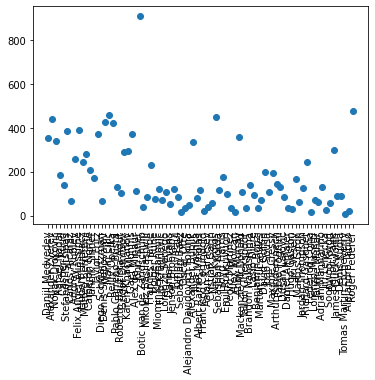

In [11]:
plt.scatter(tennis["player"], tennis["avg_aces_yr"])
plt.xticks(rotation = 90)
plt.show()

The plat is a bit messy, but there is a general trend, most players tend to serve between 40 and 400 aces per year. This makes sense, especially since there is a slight negative relationship between ranking (right to left is rank 1 -80) and amount of aces.

There is one major outlier, serving an average of over 800 aces per year, lets explore some more.

In [12]:
tennis.sort_values(by=['avg_aces_yr'], ascending = False)

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
24,John Isner,15,2,13634,1674,69,79,56,2936,71,...,111.600000,195.733333,699.000000,234.733333,691.400000,138.970667,69.140000,643.080000,1390.400000,712.220000
80,Roger Federer,24,1,11478,2759,62,77,57,6459,67,...,114.958333,269.125000,786.333333,497.833333,769.791667,180.313750,207.843750,699.836667,1556.125000,907.680417
16,Marin Cilic,17,2,7778,2521,57,77,52,4890,64,...,148.294118,287.647059,634.705882,369.176471,627.058824,184.094118,144.223529,533.152941,1261.764706,677.376471
44,Nick Kyrgios,9,2,4035,945,66,77,53,1279,67,...,105.000000,142.111111,405.555556,166.444444,404.111111,95.214444,64.657778,356.888889,809.666667,421.546667
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Alejandro Tabilo,7,2,143,90,64,68,48,220,56,...,12.857143,31.428571,49.571429,28.857143,47.285714,17.600000,12.767143,35.691429,96.857143,48.458571
49,Alex Molcan,7,2,128,83,65,67,53,238,56,...,11.857143,34.000000,63.428571,40.857143,62.714286,19.040000,16.932857,48.205714,126.142857,65.138571
35,Sebastian Baez,4,2,65,61,73,64,53,286,60,...,15.250000,71.500000,112.750000,79.750000,114.250000,42.900000,31.990000,84.562500,227.000000,116.552500
69,Federico Coria,12,2,180,178,66,62,49,644,57,...,14.833333,53.666667,71.166667,44.833333,72.250000,30.590000,19.507500,47.681667,143.416667,67.189167


This may seem like an error, but it isn't. John Isner is widely known in the tennis community for having monster serves, sometimes he is referred to as a 'serve bot'. He has been active for 15 years, and has served 13,634 aces. He serves about 400 more aces per year than anyone else on tour.

Aces are only part of the equation, let's look at some other serving statistics.

Tennis players are given 2 serves for each point, if both go out this is called a 'double fault' and results in a loss of the point.

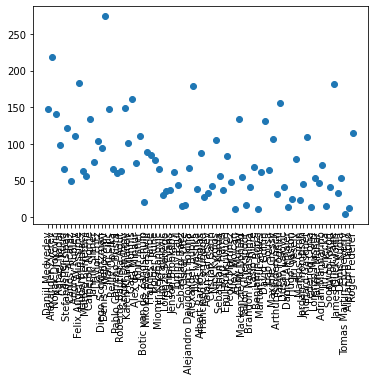

In [13]:
plt.scatter(tennis["player"], tennis["avg_double_faults_yr"])
plt.xticks(rotation = 90)
plt.show()

There is a negative relationship with ranking and average double faults with some outliers.

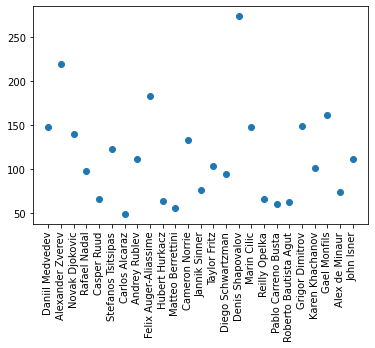

In [14]:
plt.scatter(tennis.iloc[0:25]["player"], tennis.iloc[0:25]["avg_double_faults_yr"])
plt.xticks(rotation = 90)
plt.show()

The biggest outlier is Denis Shapovalov, there is no explanation other than nerves, etc. Alexander Zverev is another outlier, at rank 2 his double faults are quite high, he has a solid game if his serves do go in so that helps, and indicates that double faults aren't as important as other statistics.

In the end, it matters who is winning their service games, so lets take a look.

In [15]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,148.375000,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,140.631579,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,98.380952,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,65.857143,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,33.166667,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,53.083333,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,4.600000,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000
79,Alejandro Tabilo,7,2,143,90,64,68,48,220,56,...,12.857143,31.428571,49.571429,28.857143,47.285714,17.600000,12.767143,35.691429,96.857143,48.458571


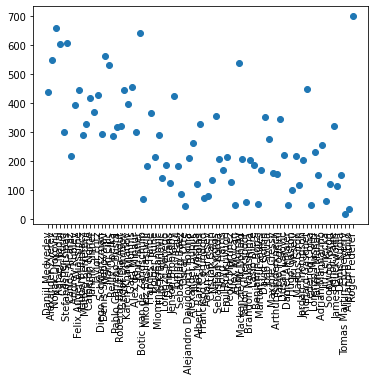

In [16]:
plt.scatter(tennis["player"], tennis["avg_total_service_games_won_yr"])
plt.xticks(rotation = 90)
plt.show()

We see that signature negative relationship again, with the exception of Roger Federer who actually has the highest amount of service games won per year, otherwise this makes sense. Let's zoom in on the top 30 where the pattern is less obvious.

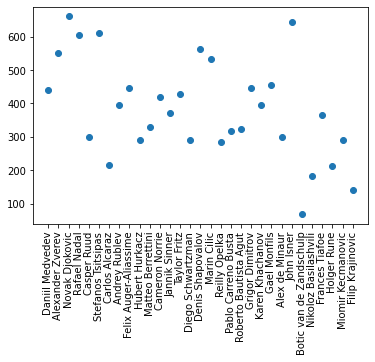

In [17]:
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_total_service_games_won_yr"])
plt.xticks(rotation = 90)
plt.show()

We can see our old friend John Isner has stats similar to Novak Djokovic and Rafa Nadal, considered to be the best in the sport due to his strong serving skills. This stat of course relies on the amount of matches played in a year, but to be in the top 30 you have to play a lot and win a lot.

The last serving statistic we will look at is break points saved. A break point is when the player you are serving against has the chance to win the game on your serve. A players ability to save these is a good reflection of how they handle pressure and if they can focus and stop their opponent.

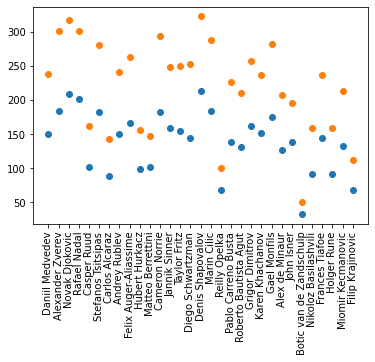

In [18]:
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_total_break_points_saved_yr"])
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_break_points_faced_yr"])
plt.xticks(rotation = 90)
plt.show()

This shows the avg break points faced and the avg break points saved, but its hard to tell what's actually going on.

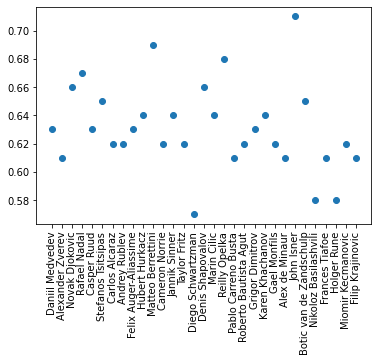

In [19]:
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_total_break_points_saved_yr"]/
                                tennis.iloc[0:31]["avg_break_points_faced_yr"])
plt.xticks(rotation = 90)
plt.show()

This plot shows the percentage of break points saved by the player, the highest percentage is.... John Isner! If he faces a break point he will just serve an ace and be right back in it! Some other notable players are Matteo Berrettini and Riley Opelka, if you recall, these players also have very good serves/ace rates, so this definitely helps with saving break points.

The lowest we see is Diego Schwartzman, I know his serve is pretty weak because he is one of the shortest players on tour, where John Isner is one of the tallest.

We have explored several metrics, and now I would like to quantify them into one, which would give me the ability to rank all the players based on their serves and service games.

In [20]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,148.375000,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,140.631579,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,98.380952,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,65.857143,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,33.166667,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,53.083333,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,4.600000,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000
79,Alejandro Tabilo,7,2,143,90,64,68,48,220,56,...,12.857143,31.428571,49.571429,28.857143,47.285714,17.600000,12.767143,35.691429,96.857143,48.458571


In [21]:
tennis.columns

Index(['player', 'career_length', 'backhand_type', 'aces', 'double_faults',
       'first_serve', '1st_serve_points_won', '2nd_serve_points_won',
       'break_points_faced', 'break_points_saved', 'service_games_played',
       'service_games_won', 'total_service_points_won', '1st_serve_return_won',
       '2nd_serve_return_won', 'total_break_pts', 'break_pts_conv',
       'return_games_played', 'return_games_won', 'return_points_won',
       'total_pts_won', 'total_service_games_won', 'total_return_games_won',
       'total_games_played', 'total_games_won', 'total_break_points_saved',
       'avg_aces_yr', 'avg_double_faults_yr', 'avg_break_points_faced_yr',
       'avg_service_games_played_yr', 'avg_total_break_pts_yr',
       'avg_return_games_played_yr', 'avg_total_break_points_saved_yr',
       'avg_total_return_games_won_yr', 'avg_total_service_games_won_yr',
       'avg_total_games_played_yr', 'avg_total_games_won_yr'],
      dtype='object')

We need to normalize the data and then we can combine the metrics, as they will all be on the same scale.

- Min-Max normalization  
    - Good for data without outliers
    - Everything on scale of 0 - 1

In [22]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,148.375000,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,140.631579,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,98.380952,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,65.857143,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,33.166667,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,53.083333,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,4.600000,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000
79,Alejandro Tabilo,7,2,143,90,64,68,48,220,56,...,12.857143,31.428571,49.571429,28.857143,47.285714,17.600000,12.767143,35.691429,96.857143,48.458571


In [23]:
normalize = ['aces', 'double_faults','break_points_faced', 'service_games_played',
       'total_service_points_won', 'total_break_pts',
       'return_games_played', 'total_service_games_won', 'total_return_games_won',
       'total_games_played', 'total_games_won', 'total_break_points_saved',
       'avg_aces_yr', 'avg_double_faults_yr', 'avg_break_points_faced_yr',
       'avg_service_games_played_yr', 'avg_total_break_pts_yr',
       'avg_return_games_played_yr', 'avg_total_break_points_saved_yr',
       'avg_total_return_games_won_yr', 'avg_total_service_games_won_yr',
       'avg_total_games_played_yr', 'avg_total_games_won_yr']

percents = ['first_serve', '1st_serve_points_won', '2nd_serve_points_won',
        'break_points_saved', 'service_games_won', '1st_serve_return_won',
        '2nd_serve_return_won', 'break_pts_conv', 'return_games_won',
        'return_points_won', 'total_pts_won']

In [24]:
normalized = tennis.copy()
for n in normalize:
    # normalize
    normalized[n] = (normalized[n]-normalized[n].min())/(normalized[n].max()-normalized[n].min())

Make the percent's between 0 and 1

In [25]:
normalized[percents] = 0.01*normalized[percents]

In [26]:
normalized

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,0.206633,0.402211,0.60,0.75,0.52,0.283155,0.63,...,0.533686,0.719329,0.661935,0.607163,0.678052,0.685231,0.569351,0.617901,0.669906,0.626625
1,Alexander Zverev,9,2,0.289654,0.673808,0.65,0.74,0.50,0.410748,0.61,...,0.796667,0.930556,0.848339,0.740241,0.868393,0.855856,0.697953,0.780675,0.858257,0.786039
2,Novak Djokovic,19,2,0.470991,0.915342,0.65,0.74,0.55,0.930547,0.66,...,0.504943,0.982421,0.974971,1.000000,0.968443,0.982507,1.000000,0.941449,0.971743,0.989817
3,Rafael Nadal,21,2,0.280977,0.705943,0.68,0.72,0.57,0.976430,0.67,...,0.348110,0.928666,0.891692,0.962497,0.902115,0.943994,0.991951,0.861551,0.896847,0.926146
4,Casper Ruud,7,2,0.069932,0.151348,0.65,0.72,0.54,0.163734,0.63,...,0.227384,0.472317,0.442146,0.362387,0.440034,0.450599,0.342727,0.414394,0.441101,0.409894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,James Duckworth,12,2,0.078020,0.129578,0.56,0.72,0.50,0.146606,0.64,...,0.106038,0.218474,0.157078,0.093952,0.159672,0.213751,0.080131,0.139896,0.158361,0.128963
77,Denis Kudla,12,2,0.076697,0.212163,0.58,0.70,0.51,0.203488,0.58,...,0.179968,0.318232,0.228060,0.152672,0.234892,0.275360,0.143846,0.195857,0.231439,0.188930
78,Tomas Martin Etcheverry,5,2,0.000000,0.000000,0.71,0.64,0.45,0.000471,0.61,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
79,Alejandro Tabilo,7,2,0.007942,0.023151,0.64,0.68,0.48,0.019642,0.56,...,0.030650,0.039116,0.033036,0.032601,0.030963,0.028141,0.036870,0.027607,0.032011,0.031022


Now we have a completely normalized dataframe, so we can combine some metrics!

In [27]:
# double faults are bad, the best score right now means most double faults, lets fix that!
normalized["avg_double_faults_yr"] = 1 - normalized["avg_double_faults_yr"]

In [28]:
normalized.columns

Index(['player', 'career_length', 'backhand_type', 'aces', 'double_faults',
       'first_serve', '1st_serve_points_won', '2nd_serve_points_won',
       'break_points_faced', 'break_points_saved', 'service_games_played',
       'service_games_won', 'total_service_points_won', '1st_serve_return_won',
       '2nd_serve_return_won', 'total_break_pts', 'break_pts_conv',
       'return_games_played', 'return_games_won', 'return_points_won',
       'total_pts_won', 'total_service_games_won', 'total_return_games_won',
       'total_games_played', 'total_games_won', 'total_break_points_saved',
       'avg_aces_yr', 'avg_double_faults_yr', 'avg_break_points_faced_yr',
       'avg_service_games_played_yr', 'avg_total_break_pts_yr',
       'avg_return_games_played_yr', 'avg_total_break_points_saved_yr',
       'avg_total_return_games_won_yr', 'avg_total_service_games_won_yr',
       'avg_total_games_played_yr', 'avg_total_games_won_yr'],
      dtype='object')

In [29]:
avg = ['avg_double_faults_yr', 'avg_aces_yr', 'first_serve', '1st_serve_points_won', 
       '2nd_serve_points_won', 'break_points_saved', 'avg_total_break_points_saved_yr',
       'avg_total_service_games_won_yr']

In [30]:
normalized['serving_score'] = normalized[avg].mean(axis = 1)
tennis['serving_score'] = normalized[avg].mean(axis = 1)

In [31]:
normalized.sort_values(by=['serving_score'], ascending = False)

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score
24,John Isner,15,2,1.000000,0.570491,0.69,0.79,0.56,0.446417,0.71,...,0.582451,0.885379,0.421525,0.894860,0.633287,0.277072,0.916901,0.890068,0.779572,0.737876
80,Roger Federer,24,1,0.841459,0.945404,0.62,0.77,0.57,1.000000,0.67,...,0.825149,1.000000,0.918552,1.000000,0.839422,0.868079,1.000000,1.000000,1.000000,0.697783
2,Novak Djokovic,19,2,0.470991,0.915342,0.65,0.74,0.55,0.930547,0.66,...,0.982421,0.974971,1.000000,0.968443,0.982507,1.000000,0.941449,0.971743,0.989817,0.673382
3,Rafael Nadal,21,2,0.280977,0.705943,0.68,0.72,0.57,0.976430,0.67,...,0.928666,0.891692,0.962497,0.902115,0.943994,0.991951,0.861551,0.896847,0.926146,0.661657
5,Stefanos Tsitsipas,6,1,0.168689,0.246026,0.62,0.76,0.55,0.248900,0.65,...,0.860560,0.897629,0.672337,0.896112,0.847289,0.601968,0.867248,0.896878,0.827316,0.659939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Oscar Otte,11,2,0.025884,0.057706,0.58,0.75,0.49,0.035512,0.62,...,0.031686,0.042667,0.033901,0.043748,0.030597,0.030890,0.042841,0.043201,0.041174,0.437205
49,Alex Molcan,7,2,0.006839,0.020733,0.65,0.67,0.53,0.022470,0.56,...,0.047619,0.051223,0.055270,0.051656,0.035320,0.054620,0.045929,0.051437,0.049833,0.434603
69,Federico Coria,12,2,0.010663,0.053559,0.66,0.62,0.49,0.086266,0.57,...,0.112654,0.061379,0.062782,0.064445,0.092908,0.065591,0.045162,0.062896,0.052146,0.431119
78,Tomas Martin Etcheverry,5,2,0.000000,0.000000,0.71,0.64,0.45,0.000471,0.61,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426250


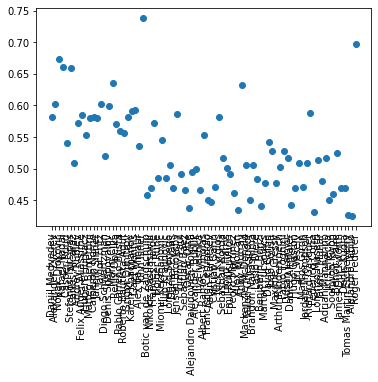

In [32]:
plt.scatter(tennis["player"], tennis["serving_score"])
plt.xticks(rotation = 90)
plt.show()

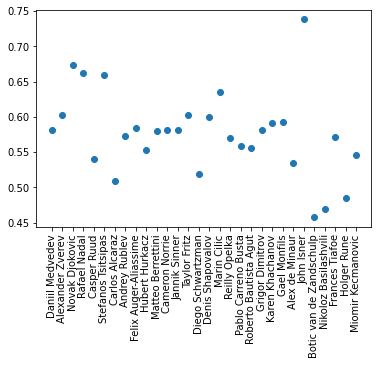

In [33]:
plt.scatter(tennis.iloc[0:30]["player"], tennis.iloc[0:30]["serving_score"])
plt.xticks(rotation = 90)
plt.show()

In [34]:
isner = tennis[tennis["player"] == 'John Isner']

In [35]:
isner

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score
24,John Isner,15,2,13634,1674,69,79,56,2936,71,...,195.733333,699.0,234.733333,691.4,138.970667,69.14,643.08,1390.4,712.22,0.737876


In [36]:
isner.iloc[0][avg].to_list()
avg

['avg_double_faults_yr',
 'avg_aces_yr',
 'first_serve',
 '1st_serve_points_won',
 '2nd_serve_points_won',
 'break_points_saved',
 'avg_total_break_points_saved_yr',
 'avg_total_service_games_won_yr']

In [37]:
visualize = ['avg_double_faults_yr', 'avg_aces_yr', 'first_serve', '1st_serve_points_won', 
       '2nd_serve_points_won', 'avg_total_break_points_saved_yr',
       'avg_total_service_games_won_yr']
names = ['Serve Success', 'Aces/yr', "1st serve pct", '1st serve points won', '2nd serve pts won',
         'Avg break points saved/yr', 'Avg service games won/yr']

In [55]:
best_serve = normalized.sort_values(by=['serving_score'], ascending = False)
best_serve = best_serve.iloc[:6]
best_serve_stat = tennis.sort_values(by=['serving_score'], ascending = False).iloc[:6]
best_serve

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score,return_score,overall_score
24,John Isner,15,2,1.000000,0.570491,0.69,0.79,0.56,0.446417,0.71,...,0.421525,0.894860,0.633287,0.277072,0.916901,0.890068,0.779572,0.737876,0.303414,0.520645
80,Roger Federer,24,1,0.841459,0.945404,0.62,0.77,0.57,1.000000,0.67,...,0.918552,1.000000,0.839422,0.868079,1.000000,1.000000,1.000000,0.697783,0.501616,0.599700
2,Novak Djokovic,19,2,0.470991,0.915342,0.65,0.74,0.55,0.930547,0.66,...,1.000000,0.968443,0.982507,1.000000,0.941449,0.971743,0.989817,0.673382,0.550000,0.611691
3,Rafael Nadal,21,2,0.280977,0.705943,0.68,0.72,0.57,0.976430,0.67,...,0.962497,0.902115,0.943994,0.991951,0.861551,0.896847,0.926146,0.661657,0.550390,0.606024
5,Stefanos Tsitsipas,6,1,0.168689,0.246026,0.62,0.76,0.55,0.248900,0.65,...,0.672337,0.896112,0.847289,0.601968,0.867248,0.896878,0.827316,0.659939,0.428394,0.544166
16,Marin Cilic,17,2,0.569380,0.863165,0.57,0.77,0.52,0.753457,0.64,...,0.675504,0.808564,0.858270,0.596998,0.755954,0.804739,0.740277,0.635044,0.431400,0.533222


In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=3, 
    specs=[[{"type": "pie"}, {"type": "pie"},{"type": "bar"}],
           [{"type": "pie"}, {"type": "pie"},{"type": "bar"}],
           [{"type": "pie"}, {"type": "pie"},{"type": "bar"}]],
    subplot_titles=("John Isner", "Roger Federer","Aces/yr","Novak Djokovic", "Rafael Nadal" 
    ,"Average Service Won", "Stefanos Tsitsipas","Marin Cilic","1st Serve Pct"),)

fig.add_trace(go.Bar(x = best_serve_stat["player"], y = best_serve_stat["avg_aces_yr"], showlegend=False), row = 1, col = 3)
fig.add_trace(go.Bar(x = best_serve_stat["player"], y = best_serve_stat["avg_total_service_games_won_yr"],showlegend=False), row = 2, col = 3)
fig.add_trace(go.Bar(x = best_serve_stat["player"], y = best_serve_stat["first_serve"],showlegend=False), row = 3, col = 3)

labels = names

rows = [1,1,2,2,3,3]
cols = [1,2,1,2,1,2]

for i in range(0,6):
    values = best_serve.iloc[i][visualize].to_list()
    # Use `hole` to create a donut-like pie chart
    fig.add_trace(go.Pie(labels=names, values=values, hole=.3),
                    row = rows[i] , col = cols[i])

fig.update_layout(height=1200, width=1000,
                  title_text="Top 6 Server's in Men's Tennis")
fig.show()

This plot shows what helps a player most in their serving ranking, shown for the top 6 servers according to my metrics. The amount of aces John Isner serves really helps him achieve a high score, I mean he serves on average 400 more aces than anyone else so that definitely helps his service game. 

The big indicator for success is obviously service games won, the more you win service games, the better player you are. Djokovic is helped the most by this statistic, his average aces are pretty low comparatively, but he is also very good under pressure, saving a lot of break points.

All of these players have very well rounded service games, with successful serves and high percentage win rates on serve.

### Return of Serve

John Isner has come up a lot, he is a great server, but in tennis you need a lot of other skills as well, including returning, and playing on return of serve games.

In [40]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500,0.581997
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444,0.602709
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526,0.673382
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429,0.661657
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714,0.540753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000,0.470139
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000,0.469136
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000,0.426250
79,Alejandro Tabilo,7,2,143,90,64,68,48,220,56,...,31.428571,49.571429,28.857143,47.285714,17.600000,12.767143,35.691429,96.857143,48.458571,0.424998


In [41]:
return_var = ['avg_total_return_games_won_yr', 'break_pts_conv','return_points_won','1st_serve_return_won',
            '2nd_serve_return_won']
tennis['return_score'] = normalized[return_var].mean(axis = 1)
normalized['return_score'] = normalized[return_var].mean(axis = 1)

In [42]:
tennis.sort_values(by = ['return_score'], ascending = False)

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score,return_score
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429,0.661657,0.550390
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526,0.673382,0.550000
50,Andy Murray,17,2,6132,2276,58,74,52,5417,62,...,658.470588,468.294118,652.823529,197.561176,202.375294,539.945882,1311.294118,742.321176,0.632949,0.514956
80,Roger Federer,24,1,11478,2759,62,77,57,6459,67,...,786.333333,497.833333,769.791667,180.313750,207.843750,699.836667,1556.125000,907.680417,0.697783,0.501616
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444,0.602709,0.463591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Jiri Lehecka,2,2,50,30,64,67,53,95,63,...,78.500000,31.500000,79.000000,29.925000,12.640000,61.230000,157.500000,73.870000,0.450743,0.299266
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000,0.426250,0.296000
59,Maxime Cressy,3,2,581,319,63,78,52,221,67,...,183.333333,63.000000,182.333333,49.356667,23.703333,159.500000,365.666667,183.203333,0.478086,0.294694
52,Tallon Griekspoor,7,2,247,122,64,70,50,313,63,...,77.000000,32.285714,76.571429,28.170000,11.485714,60.060000,153.571429,71.545714,0.449734,0.288282


Not surprisingly, we have Rafael Nadal and Novak Djokovic at the top, they are definitely some of the best in the sport both right now, and throughout their careers.

John Isner, the mega-server is near the end in return games, explaining his ranking at the moment, his strong serve game is what makes him so good.

In [57]:
best_return = normalized.sort_values(by=['return_score'], ascending = False)
best_return = best_return.iloc[:6]
best_return_stats = tennis.sort_values(by=['return_score'], ascending = False).iloc[:6]
best_return

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score,return_score,overall_score
3,Rafael Nadal,21,2,0.280977,0.705943,0.68,0.72,0.57,0.976430,0.67,...,0.962497,0.902115,0.943994,0.991951,0.861551,0.896847,0.926146,0.661657,0.550390,0.606024
2,Novak Djokovic,19,2,0.470991,0.915342,0.65,0.74,0.55,0.930547,0.66,...,1.000000,0.968443,0.982507,1.000000,0.941449,0.971743,0.989817,0.673382,0.550000,0.611691
50,Andy Murray,17,2,0.448342,0.778507,0.58,0.74,0.52,0.836266,0.62,...,0.862749,0.843120,0.925416,0.844779,0.765900,0.837594,0.813518,0.632949,0.514956,0.573952
80,Roger Federer,24,1,0.841459,0.945404,0.62,0.77,0.57,1.000000,0.67,...,0.918552,1.000000,0.839422,0.868079,1.000000,1.000000,1.000000,0.697783,0.501616,0.599700
1,Alexander Zverev,9,2,0.289654,0.673808,0.65,0.74,0.50,0.410748,0.61,...,0.740241,0.868393,0.855856,0.697953,0.780675,0.858257,0.786039,0.602709,0.463591,0.533150
14,Diego Schwartzman,12,2,0.056916,0.385971,0.63,0.66,0.50,0.462445,0.57,...,0.540256,0.510735,0.659884,0.534688,0.402786,0.501694,0.451760,0.519262,0.456938,0.488100


In [44]:
viz = ['avg_total_return_games_won_yr', 'break_pts_conv','return_points_won','1st_serve_return_won',
            '2nd_serve_return_won']
names_r = ["Avg Return Games won","Break pts converted", "Pct Return pts won","Pct 1st serve return won",
        "Pct 2nd serve return won"]

In [63]:
fig = make_subplots(rows=3, cols=3, 
    specs=[[{"type": "pie"}, {"type": "pie"},{"type": "bar"}],
           [{"type": "pie"}, {"type": "pie"},{"type": "bar"}],
           [{"type": "pie"}, {"type": "pie"},{"type": "bar"}]],
    subplot_titles=("Rafael Nadal", "Novak Djokovic","Avg Return Won", "Andy Murray", 
    "Roger Federer","Pct Return Points Won", "Alexander Zverev", "Diego Schwartzman","Break pts Converted"),)

fig.add_trace(go.Bar(x = best_return["player"], y = best_return_stats["avg_total_return_games_won_yr"],showlegend=False), row = 1, col = 3)
fig.add_trace(go.Bar(x = best_return["player"], y = best_return_stats["return_points_won"],showlegend=False), row = 2, col = 3)
fig.add_trace(go.Bar(x = best_return["player"], y = best_return_stats["break_pts_conv"],showlegend=False), row = 3, col = 3)


rows = [1,1,2,2,3,3]
cols = [1,2,1,2,1,2]

for i in range(0,6):
    values = best_return.iloc[i][viz].to_list()
    # Use `hole` to create a donut-like pie chart
    fig.add_trace(go.Pie(labels=names_r, values=values, hole=.3),
                    row = rows[i] , col = cols[i])

fig.update_layout(height=1200, width=1000,
                  title_text="Top 6 Returner's in Men's Tennis")
fig.show()

This shows how much each metric contributes to the players score for their return games. The top 4 players, sometimes referred to as the "Big 4" (Nadal, Federer, and Djokovic are the Big Three, but Murray constantly challenged them throughout his career) are really helped by the amount of return games they win.

When we look at Diego Schwartzman, he has a very consistent well rounded return game. He converts break points, wins close to the highest amount of return points, but compared to the other players he wins a lot less return games. I think this is simply because the other players have strong serve games as well, so they go further in tournaments and hence play more (and win more) return games. Schwartzman is a relatively weak server so he plays less return games, however when he does play return games he performs very well.

## The Best Tennis Players

In [47]:
normalized["overall_score"] = (normalized["serving_score"] + normalized["return_score"])/2


In [48]:
normalized.sort_values(by=['overall_score'], ascending = False)

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score,return_score,overall_score
2,Novak Djokovic,19,2,0.470991,0.915342,0.65,0.74,0.55,0.930547,0.66,...,1.000000,0.968443,0.982507,1.000000,0.941449,0.971743,0.989817,0.673382,0.550000,0.611691
3,Rafael Nadal,21,2,0.280977,0.705943,0.68,0.72,0.57,0.976430,0.67,...,0.962497,0.902115,0.943994,0.991951,0.861551,0.896847,0.926146,0.661657,0.550390,0.606024
80,Roger Federer,24,1,0.841459,0.945404,0.62,0.77,0.57,1.000000,0.67,...,0.918552,1.000000,0.839422,0.868079,1.000000,1.000000,1.000000,0.697783,0.501616,0.599700
50,Andy Murray,17,2,0.448342,0.778507,0.58,0.74,0.52,0.836266,0.62,...,0.862749,0.843120,0.925416,0.844779,0.765900,0.837594,0.813518,0.632949,0.514956,0.573952
5,Stefanos Tsitsipas,6,1,0.168689,0.246026,0.62,0.76,0.55,0.248900,0.65,...,0.672337,0.896112,0.847289,0.601968,0.867248,0.896878,0.827316,0.659939,0.428394,0.544166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Jiri Lehecka,2,2,0.001103,0.002419,0.64,0.67,0.53,0.000000,0.63,...,0.037593,0.073499,0.089592,0.036329,0.064998,0.072238,0.059680,0.450743,0.299266,0.375004
63,Daniel Altmaier,8,1,0.017060,0.032135,0.61,0.70,0.46,0.043526,0.64,...,0.039483,0.055560,0.088770,0.038395,0.047001,0.054576,0.046364,0.442283,0.305679,0.373981
36,Oscar Otte,11,2,0.025884,0.057706,0.58,0.75,0.49,0.035512,0.62,...,0.033901,0.043748,0.030597,0.030890,0.042841,0.043201,0.041174,0.437205,0.310178,0.373692
52,Tallon Griekspoor,7,2,0.015589,0.034209,0.64,0.70,0.50,0.034255,0.63,...,0.039078,0.070241,0.080842,0.031410,0.063285,0.069632,0.057059,0.449734,0.288282,0.369008


In [49]:
top_players = normalized.sort_values(by=['overall_score'], ascending = False)[0:10]
top_players['player'].to_list()

['Novak Djokovic',
 'Rafael Nadal',
 'Roger Federer',
 'Andy Murray',
 'Stefanos Tsitsipas',
 'Marin Cilic',
 'Alexander Zverev',
 'John Isner',
 'Jenson Brooksby',
 'Gael Monfils']

In [71]:
fig = go.Figure(data=[
    go.Bar(name='Serve', x=top_players['player'].to_list(), y=top_players['serving_score']),
    go.Bar(name='Return', x=top_players['player'].to_list(), y=top_players['return_score'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text="Best Tennis Players Currently on Tour<br>\
<sup>Serve and Return Rankings Based on Career Stats</sup>", title_x=0.5)

fig.show()

According to my ranking system, Novak Djokovic is the best player currently on tour. Obviously there are other things to consider, for example Rafael Nadal as 22 grand slam titles (23 on the way? Wimbledon is currently ongoing) and Roger Federer and Novak Djokovic both have 20 titles.

The GOAT debate will probably never be settled, but according to entire career stats for the metrics I collected, Novak wins.

Out of curiosity, lets look at the worst players on tour (in the top 80)

In [59]:
bottom_players = normalized.sort_values(by=['overall_score'])[:10]
bottom_players['player'].to_list()

['Tomas Martin Etcheverry',
 'Tallon Griekspoor',
 'Oscar Otte',
 'Daniel Altmaier',
 'Jiri Lehecka',
 'Benjamin Bonzi',
 'Alejandro Tabilo',
 'James Duckworth',
 'Maxime Cressy',
 'Federico Coria']

These players are by no means bad, when using career stats its hard to quantify player skill, for players like Federer, Djokovic and Nadal they have been consistently good for their entire careers but many players deal with injuries, which throws off averages and could really lower someone's ranking in this system.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b62d15e2-711d-4773-aa8c-7cdf1155e6fd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>